In [1]:
# Importa as bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb

In [ ]:
# Para visualizar as versões das libs importadas
import lightgbm
import sklearn
import joblib

print("LightGBM:", lightgbm.__version__)
print("Scikit-learn:", sklearn.__version__)
print("Joblib:", joblib.__version__)

LightGBM: 4.6.0
Scikit-learn: 1.7.2
Joblib: 1.5.2


In [2]:
# Importa o dataset
df = pd.read_pickle(r'C:\Users\szsou\Desktop\Projetos\Vídeos\ENEM\Projeto\microdados_enem_2021_2023_limpo.pkl')
df

,TP_FAIXA_ETARIA,NU_NOTA_REDACAO,Qtd Residentes,MEDIA_NOTAS,Instrução do pai_ord,Instrução do pai_nao_sei,Instrução da mãe_ord,Instrução da mãe_nao_sei,Profissão do pai_ord,Profissão do pai_nao_sei,...,SG_UF_PROVA_RS,SG_UF_PROVA_SC,SG_UF_PROVA_SE,SG_UF_PROVA_SP,SG_UF_PROVA_TO,TP_LINGUA_0,TP_LINGUA_1,Acesso à internet_A,Acesso à internet_B,Renda Familiar_ord
16392014,12,560.0,3,504.375,2,0,2,0,2,0,...,0,0,0,0,0,0,1,1,0,2
16392016,3,780.0,6,639.500,2,0,2,0,2,0,...,0,0,0,0,0,1,0,0,1,2
16392017,2,780.0,4,517.575,4,0,5,0,0,1,...,0,0,0,0,0,0,1,0,1,3
16392021,8,520.0,2,477.000,2,0,2,0,2,0,...,0,0,0,0,0,1,0,0,1,2
16392022,4,380.0,2,488.675,4,0,4,0,4,0,...,0,0,0,0,0,0,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27191895,4,600.0,5,543.000,0,1,3,0,2,0,...,1,0,0,0,0,0,1,0,1,11
27191896,12,500.0,3,567.200,2,0,2,0,4,0,...,1,0,0,0,0,1,0,0,1,4
27191898,3,600.0,4,523.700,5,0,5,0,4,0,...,1,0,0,0,0,1,0,0,1,6
27191900,12,540.0,5,583.200,3,0,5,0,0,1,...,1,0,0,0,0,1,0,0,1,6


In [3]:
# Dropando a nota da redação
df = df.drop(columns=['NU_NOTA_REDACAO'])

Random Forest Tradicional

In [4]:
# Separa features e target
X = df.drop(columns=['MEDIA_NOTAS'])
y = df['MEDIA_NOTAS']

X

,TP_FAIXA_ETARIA,Qtd Residentes,Instrução do pai_ord,Instrução do pai_nao_sei,Instrução da mãe_ord,Instrução da mãe_nao_sei,Profissão do pai_ord,Profissão do pai_nao_sei,Profissão da mãe_ord,Profissão da mãe_nao_sei,...,SG_UF_PROVA_RS,SG_UF_PROVA_SC,SG_UF_PROVA_SE,SG_UF_PROVA_SP,SG_UF_PROVA_TO,TP_LINGUA_0,TP_LINGUA_1,Acesso à internet_A,Acesso à internet_B,Renda Familiar_ord
16392014,12,3,2,0,2,0,2,0,2,0,...,0,0,0,0,0,0,1,1,0,2
16392016,3,6,2,0,2,0,2,0,2,0,...,0,0,0,0,0,1,0,0,1,2
16392017,2,4,4,0,5,0,0,1,4,0,...,0,0,0,0,0,0,1,0,1,3
16392021,8,2,2,0,2,0,2,0,2,0,...,0,0,0,0,0,1,0,0,1,2
16392022,4,2,4,0,4,0,4,0,2,0,...,0,0,0,0,0,0,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27191895,4,5,0,1,3,0,2,0,2,0,...,1,0,0,0,0,0,1,0,1,11
27191896,12,3,2,0,2,0,4,0,4,0,...,1,0,0,0,0,1,0,0,1,4
27191898,3,4,5,0,5,0,4,0,4,0,...,1,0,0,0,0,1,0,0,1,6
27191900,12,5,3,0,5,0,0,1,0,1,...,1,0,0,0,0,1,0,0,1,6


In [41]:
# Divide os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.05, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((298266, 67), (5667063, 67), (298266,), (5667063,))

In [42]:
# Fit do modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [43]:
# Predições
y_pred = model.predict(X_test)

# Avaliação do modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R²: {r2}')

MAE: 52.155858249998566
MSE: 4384.947724495867
R²: 0.3060261376030199


LightGBM

In [5]:
# Split treino/val
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import lightgbm as lgb
from lightgbm import early_stopping, log_evaluation

# Modelo padrão - Loss function: RMSE

# 5) Modelo LightGBM (sklearn API)
lgbm = lgb.LGBMRegressor(
    objective="regression",
    metric="rmse",
    boosting_type="gbdt",
    n_estimators=2000,        # muitas árvores com early stopping (ele para antes)
    learning_rate=0.05,
    num_leaves=63,            # controla complexidade (aumente se tiver mais dados)
    max_depth=-1,             # -1 = sem limite; pode ajustar se overfitar
    subsample=0.8,            # bagging (amostragem de linhas)
    colsample_bytree=0.8,     # amostragem de colunas por árvore
    min_data_in_leaf=20,      # folhas com poucos dados tendem a overfit
    reg_lambda=1.0,           # L2 regularization
    n_jobs=-1,
    random_state=42
)

# 6) Treino com early stopping
lgbm.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    eval_metric="rmse",
    callbacks=[early_stopping(stopping_rounds=100), log_evaluation(100)]
)


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.118551 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 205
[LightGBM] [Info] Number of data points in the train set: 4772263, number of used features: 66
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 518.752682
Training until validation scores don't improve for 100 rounds
[10

,boosting_type,'gbdt'
,num_leaves,63
,max_depth,-1
,learning_rate,0.05
,n_estimators,2000
,subsample_for_bin,200000
,objective,'regression'
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


Resultados - LightGBM

In [ ]:

# 7) Avaliação - RMSE
y_pred = lgbm.predict(X_val, num_iteration=lgbm.best_iteration_)
mae  = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred) ** 0.5
r2   = r2_score(y_val, y_pred)

print(f"Best iter: {lgbm.best_iteration_}")
print(f"MAE : {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²  : {r2:.4f}")

# 8) Importância das features (gain)
imp = pd.DataFrame({
    "feature": X.columns,
    "importance": lgbm.booster_.feature_importance(importance_type="gain")
}).sort_values("importance", ascending=False)

print(imp.head(20))

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
Best iter: 1998
MAE : 48.986
RMSE: 62.197
R²  : 0.3868
                 feature    importance
66    Renda Familiar_ord  5.970461e+10
6   Profissão do pai_ord  1.070229e+10
33           TP_ESCOLA_2  6.413724e+09
63           TP_LINGUA_1  6.381631e+09
4   Instrução da mãe_ord  5.258706e+09
62           TP_LINGUA_0  4.561759e+09
8   Profissão da mãe_ord  3.735795e+09
2   Instrução do pai_ord  3.401917e+09
18         TP_COR_RACA_1  3.360917e+09
0        TP_FAIXA_ETARIA  3.178106e+09
29     TP_ST_CONCLUSAO_1  2.525975e+09
1         Qtd Residentes  2.227075e+09
34           TP_ESCOLA_3  1.182387e+09
10             TP_SEXO_F  1.025683e+09
11             TP_SEXO_M  8.960326e+08
45        SG_UF_PROVA_MG  7.562929e+08
64   Acesso à internet_A  7.015842e+08
40        SG_UF_PROVA_CE  5.992999e+08
26    TP_NACIONALIDADE_2  4.297798e+08
30     TP_ST_CONCLUSAO_2  4.159900e+08


In [18]:
y_pred

,Predicted_MEDIA_NOTAS
0,493.582824
1,585.077882
2,593.190081
3,552.417607
4,591.031498
...,...
1193061,479.399627
1193062,506.729931
1193063,452.594590
1193064,508.363332


In [9]:
# Transformar y_pred em DataFrame
y_pred = pd.DataFrame(y_pred, columns=['nota_prevista'])

# Juntar previsões com X_val e y_val

df_enem_treinado = pd.concat(
    [
        X_val.reset_index(drop=True),
        pd.Series(y_val, name="nota_real").reset_index(drop=True),
        pd.Series(y_pred.iloc[:, 0], name="nota_prevista").reset_index(drop=True)
    ],
    axis=1
)
df_enem_treinado

,TP_FAIXA_ETARIA,Qtd Residentes,Instrução do pai_ord,Instrução do pai_nao_sei,Instrução da mãe_ord,Instrução da mãe_nao_sei,Profissão do pai_ord,Profissão do pai_nao_sei,Profissão da mãe_ord,Profissão da mãe_nao_sei,...,SG_UF_PROVA_SE,SG_UF_PROVA_SP,SG_UF_PROVA_TO,TP_LINGUA_0,TP_LINGUA_1,Acesso à internet_A,Acesso à internet_B,Renda Familiar_ord,nota_real,nota_prevista
0,2,4,7,0,5,0,0,1,2,0,...,0,0,0,0,1,0,1,3,585.200,493.582824
1,2,4,6,0,6,0,4,0,4,0,...,0,0,0,1,0,0,1,11,677.300,585.077882
2,3,6,6,0,6,0,4,0,4,0,...,0,0,0,1,0,0,1,8,714.525,593.190081
3,8,3,6,0,5,0,2,0,2,0,...,0,0,0,1,0,0,1,2,548.000,552.417607
4,3,5,6,0,6,0,4,0,0,1,...,0,0,0,1,0,0,1,12,598.250,591.031498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193061,11,1,4,0,4,0,0,1,0,1,...,0,0,0,0,1,1,0,1,405.100,479.399627
1193062,2,5,5,0,2,0,3,0,2,0,...,0,1,0,1,0,0,1,4,614.350,506.729931
1193063,5,3,4,0,5,0,2,0,2,0,...,0,0,0,0,1,0,1,1,414.375,452.594590
1193064,4,3,5,0,5,0,4,0,2,0,...,0,0,0,1,0,0,1,4,450.950,508.363332


In [ ]:
# Adiciona a coluna de erro absoluto
df_enem_treinado['erro_absoluto'] = abs(df_enem_treinado['nota_real'] - df_enem_treinado['nota_prevista'])
df_enem_treinado

,TP_FAIXA_ETARIA,Qtd Residentes,Instrução do pai_ord,Instrução do pai_nao_sei,Instrução da mãe_ord,Instrução da mãe_nao_sei,Profissão do pai_ord,Profissão do pai_nao_sei,Profissão da mãe_ord,Profissão da mãe_nao_sei,...,SG_UF_PROVA_SP,SG_UF_PROVA_TO,TP_LINGUA_0,TP_LINGUA_1,Acesso à internet_A,Acesso à internet_B,Renda Familiar_ord,nota_real,nota_prevista,erro_absoluto
0,2,4,7,0,5,0,0,1,2,0,...,0,0,0,1,0,1,3,585.200,493.582824,91.617176
1,2,4,6,0,6,0,4,0,4,0,...,0,0,1,0,0,1,11,677.300,585.077882,92.222118
2,3,6,6,0,6,0,4,0,4,0,...,0,0,1,0,0,1,8,714.525,593.190081,121.334919
3,8,3,6,0,5,0,2,0,2,0,...,0,0,1,0,0,1,2,548.000,552.417607,4.417607
4,3,5,6,0,6,0,4,0,0,1,...,0,0,1,0,0,1,12,598.250,591.031498,7.218502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193061,11,1,4,0,4,0,0,1,0,1,...,0,0,0,1,1,0,1,405.100,479.399627,74.299627
1193062,2,5,5,0,2,0,3,0,2,0,...,1,0,1,0,0,1,4,614.350,506.729931,107.620069
1193063,5,3,4,0,5,0,2,0,2,0,...,0,0,0,1,0,1,1,414.375,452.594590,38.219590
1193064,4,3,5,0,5,0,4,0,2,0,...,0,0,1,0,0,1,4,450.950,508.363332,57.413332


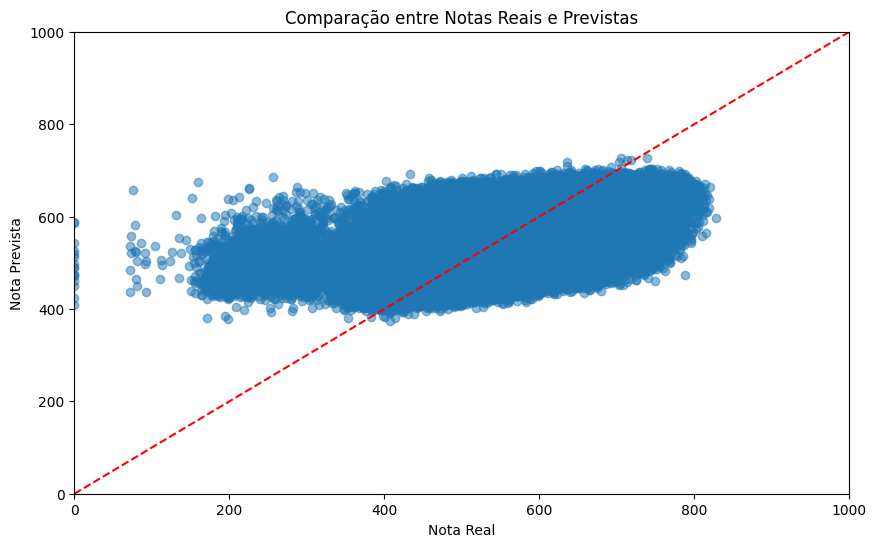

In [11]:
# Gráfico comparando notas reais e previstas
plt.figure(figsize=(10, 6))
plt.scatter(df_enem_treinado['nota_real'], df_enem_treinado['nota_prevista'], alpha=0.5)
plt.xlabel('Nota Real')
plt.ylabel('Nota Prevista')
plt.title('Comparação entre Notas Reais e Previstas')
plt.plot([0, 1000], [0, 1000], color='red', linestyle='--')  # Linha y=x para referência
plt.xlim(0, 1000)
plt.ylim(0, 1000)
plt.show()

In [12]:
# Tirando 1000k linhas aleatorias e salvando em csv
df_sampled = df_enem_treinado.sample(n=1000000, random_state=42)
df_sampled.to_csv(r'C:\Users\szsou\Desktop\Projetos\Vídeos\ENEM\Projeto\microdados_enem_2021_2023_treinado.csv', index=False)

In [13]:
# Salvando o modelo treinado
import joblib
joblib.dump(lgbm, r'C:\Users\szsou\Desktop\Projetos\Vídeos\ENEM\Projeto\lgbm_model.pkl')

['C:\\Users\\szsou\\Desktop\\Projetos\\Vídeos\\ENEM\\Projeto\\lgbm_model.pkl']

In [6]:
# Importando o modelo treinado
import joblib
model_loaded = joblib.load(r'C:\Users\szsou\Desktop\Projetos\Vídeos\ENEM\Projeto\lgbm_model.pkl')
model_loaded

,boosting_type,'gbdt'
,num_leaves,63
,max_depth,-1
,learning_rate,0.05
,n_estimators,2000
,subsample_for_bin,200000
,objective,'regression'
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


Testando modelo na base de 2020

In [9]:
# Importando base de 2020
df_2020 = pd.read_pickle(r'C:\Users\szsou\Desktop\Projetos\Vídeos\ENEM\Projeto\microdados_enem_2020_limpo.pkl')
df_2020

,NU_ANO,TP_FAIXA_ETARIA,NU_NOTA_REDACAO,Qtd Residentes,MEDIA_NOTAS,Instrução do pai_ord,Instrução do pai_nao_sei,Instrução da mãe_ord,Instrução da mãe_nao_sei,Profissão do pai_ord,...,SG_UF_PROVA_RS,SG_UF_PROVA_SC,SG_UF_PROVA_SE,SG_UF_PROVA_SP,SG_UF_PROVA_TO,TP_LINGUA_0,TP_LINGUA_1,Acesso à internet_A,Acesso à internet_B,Renda Familiar_ord
10608909,2020,3,700.0,5,533.725,3,0,2,0,3,...,1,0,0,0,0,0,1,0,1,3
10608912,2020,5,600.0,2,439.475,2,0,3,0,3,...,0,0,0,0,0,0,1,1,0,2
10608915,2020,7,640.0,5,574.225,2,0,3,0,3,...,0,0,0,0,0,1,0,0,1,2
10608922,2020,7,800.0,2,472.475,3,0,3,0,3,...,0,0,0,0,0,1,0,0,1,2
10608923,2020,13,500.0,5,458.675,3,0,4,0,3,...,0,0,0,0,0,0,1,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16391988,2020,2,340.0,4,402.400,2,0,4,0,1,...,0,0,0,0,0,1,0,0,1,2
16391999,2020,7,440.0,7,432.400,1,0,2,0,1,...,0,0,0,0,0,0,1,1,0,3
16392005,2020,2,500.0,4,400.600,4,0,4,0,3,...,0,0,0,0,0,1,0,1,0,3
16392008,2020,2,900.0,5,638.425,5,0,7,0,1,...,0,0,0,0,0,0,1,0,1,7


In [10]:
# Dropando nota da redação e ano
df_2020 = df_2020.drop(columns=['NU_NOTA_REDACAO', 'NU_ANO'])

In [11]:
# Remove linhas em que "TP_ESCOLA_4" é 1
df_2020 = df_2020[df_2020['TP_ESCOLA_4'] != 1]

# Remove linhas em que "TP_ST_CONCLUSAO_4" é 1
df_2020 = df_2020[df_2020['TP_ST_CONCLUSAO_4'] != 1]

# Dropa as duas colunas
df_2020 = df_2020.drop(columns=['TP_ESCOLA_4'])
df_2020 = df_2020.drop(columns=['TP_ST_CONCLUSAO_4'])

In [18]:
# Colunas de df_2020
print(df_2020.columns)
# Dimensões de df_2020
df_2020.shape

Index(['TP_FAIXA_ETARIA', 'Qtd Residentes', 'MEDIA_NOTAS',
       'Instrução do pai_ord', 'Instrução do pai_nao_sei',
       'Instrução da mãe_ord', 'Instrução da mãe_nao_sei',
       'Profissão do pai_ord', 'Profissão do pai_nao_sei',
       'Profissão da mãe_ord', 'Profissão da mãe_nao_sei', 'TP_SEXO_F',
       'TP_SEXO_M', 'TP_ESTADO_CIVIL_0.0', 'TP_ESTADO_CIVIL_1.0',
       'TP_ESTADO_CIVIL_2.0', 'TP_ESTADO_CIVIL_3.0', 'TP_ESTADO_CIVIL_4.0',
       'TP_COR_RACA_0', 'TP_COR_RACA_1', 'TP_COR_RACA_2', 'TP_COR_RACA_3',
       'TP_COR_RACA_4', 'TP_COR_RACA_5', 'TP_COR_RACA_6', 'TP_NACIONALIDADE_0',
       'TP_NACIONALIDADE_1', 'TP_NACIONALIDADE_2', 'TP_NACIONALIDADE_3',
       'TP_NACIONALIDADE_4', 'TP_ST_CONCLUSAO_1', 'TP_ST_CONCLUSAO_2',
       'TP_ST_CONCLUSAO_3', 'TP_ESCOLA_1', 'TP_ESCOLA_2', 'TP_ESCOLA_3',
       'SG_UF_PROVA_AC', 'SG_UF_PROVA_AL', 'SG_UF_PROVA_AM', 'SG_UF_PROVA_AP',
       'SG_UF_PROVA_BA', 'SG_UF_PROVA_CE', 'SG_UF_PROVA_DF', 'SG_UF_PROVA_ES',
       'SG_UF_PROVA_

(2207793, 68)

In [12]:
# Divide em features e target
X_2020 = df_2020.drop(columns=['MEDIA_NOTAS'])
y_2020 = df_2020['MEDIA_NOTAS']

X_2020.shape, y_2020.shape

((2207793, 67), (2207793,))

In [13]:
# Prevendo notas de 2020
y_2020_pred = model_loaded.predict(X_2020)
y_2020_pred

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


array([480.10608158, 462.09494718, 509.55616265, ..., 471.45449866,
       530.31174168, 495.38305148], shape=(2207793,))

In [21]:
# Calculando métricas para 2020
mae_2020 = mean_absolute_error(y_2020, y_2020_pred)
mse_2020 = mean_squared_error(y_2020, y_2020_pred)
r2_2020 = r2_score(y_2020, y_2020_pred)
print(f'MAE 2020: {mae_2020}')
print(f'MSE 2020: {mse_2020}')
print(f'R² 2020: {r2_2020}')

MAE 2020: 49.70701472751988
MSE 2020: 3854.017533045173
R² 2020: 0.40375484319486754


In [22]:
# Junta previsões com X_2020 e y_2020
df_2020_result = pd.concat(
    [
        X_2020.reset_index(drop=True),
        pd.Series(y_2020, name="nota_real").reset_index(drop=True),
        pd.Series(y_2020_pred, name="nota_prevista").reset_index(drop=True)
    ],
    axis=1
)
df_2020_result

,TP_FAIXA_ETARIA,Qtd Residentes,Instrução do pai_ord,Instrução do pai_nao_sei,Instrução da mãe_ord,Instrução da mãe_nao_sei,Profissão do pai_ord,Profissão do pai_nao_sei,Profissão da mãe_ord,Profissão da mãe_nao_sei,...,SG_UF_PROVA_SE,SG_UF_PROVA_SP,SG_UF_PROVA_TO,TP_LINGUA_0,TP_LINGUA_1,Acesso à internet_A,Acesso à internet_B,Renda Familiar_ord,nota_real,nota_prevista
0,3,5,3,0,2,0,3,0,2,0,...,0,0,0,0,1,0,1,3,533.725,480.106082
1,5,2,2,0,3,0,3,0,2,0,...,0,0,0,0,1,1,0,2,439.475,462.094947
2,7,5,2,0,3,0,3,0,2,0,...,0,0,0,1,0,0,1,2,574.225,509.556163
3,7,2,3,0,3,0,3,0,2,0,...,0,0,0,1,0,0,1,2,472.475,487.861771
4,13,5,3,0,4,0,3,0,3,0,...,0,0,0,0,1,1,0,4,458.675,500.348088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207788,2,4,2,0,4,0,1,0,0,1,...,0,0,0,1,0,0,1,2,402.400,484.201557
2207789,7,7,1,0,2,0,1,0,1,0,...,0,0,0,0,1,1,0,3,432.400,461.164401
2207790,2,4,4,0,4,0,3,0,2,0,...,0,0,0,1,0,1,0,3,400.600,471.454499
2207791,2,5,5,0,7,0,1,0,4,0,...,0,0,0,0,1,0,1,7,638.425,530.311742


In [23]:
# Seleciona 1 milhão de linhas aleatórias e salva em CSV
df_2020_sampled = df_2020_result.sample(n=1000000, random_state=42)
df_2020_sampled.to_csv(r'C:\Users\szsou\Desktop\Projetos\Vídeos\ENEM\Projeto\microdados_enem_2020_treinado.csv', index=False)